In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Greys_r')

In [2]:
data = pd.read_csv('house_price.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
print('Price is 0 :', sum(data['price'] == 0))

Price is 0 : 49


有49筆資料的房屋價格為0，應為誤植或資料缺失，故將其移除。

In [8]:
data.drop(data[data['price'] == 0].index, axis = 0, inplace = True)

In [9]:
data['date'].str[:4].unique()

array(['2014'], dtype=object)

所有成交資料皆在2014年。

In [10]:
data.rename(columns={'date':'month'}, inplace=True)
data['month'] = data['month'].str[5:7]
data['month'].unique()

array(['05', '06', '07'], dtype=object)

成交月份只有5、6、7月。

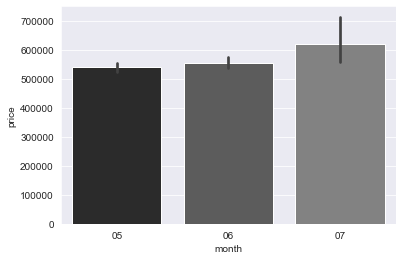

06    2155
05    1748
07     648
Name: month, dtype: int64

In [11]:
sns.barplot(x = data['month'], y = data['price'])
plt.show()
data['month'].value_counts()

大部分成交時間集中在5、6月，成交月份與價格無關聯，故刪除此項。

In [12]:
del data['month']

In [13]:
data = data[['price', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'waterfront',
             'yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
             'street', 'city', 'statezip', 'country']]

In [14]:
df = data.copy()

##### Price

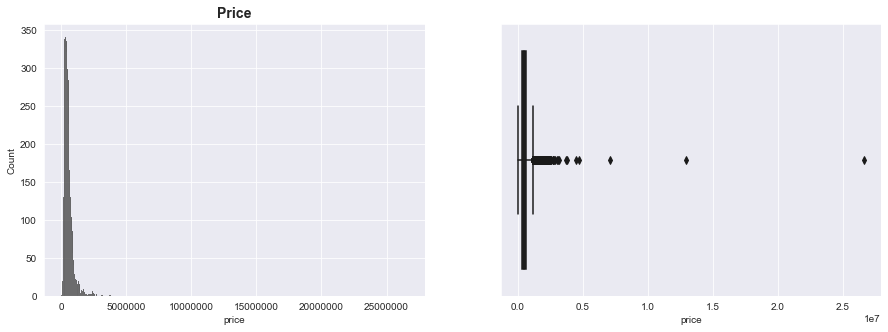

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = df['price'])
plt.ticklabel_format(style = 'plain')
plt.title('Price', fontsize = 14, weight = 'bold')

plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.show()

房價嚴重右偏，價格高於5000000的物件極少，故移除。

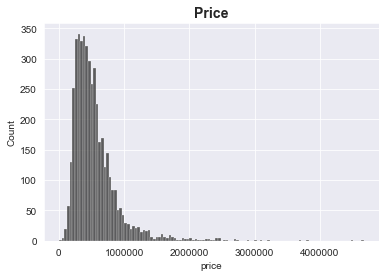

In [16]:
df.drop(df[df['price'] >= 5000000].index, axis=0, inplace=True)

sns.histplot(x = df['price'])
plt.ticklabel_format(style = 'plain')
plt.title('Price', fontsize = 14, weight = 'bold')
plt.show()

<AxesSubplot:xlabel='price'>

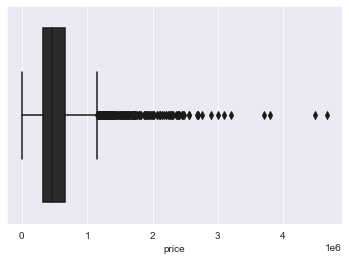

In [17]:
sns.boxplot(df['price'])

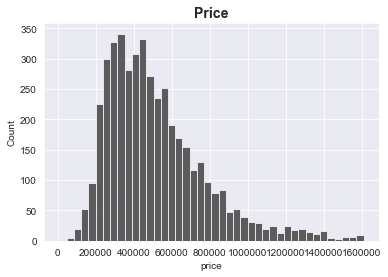

In [18]:
std_plus = df['price'].mean() + 3 * df['price'].std()
std_minus = df['price'].mean() - 3 * df['price'].std()

df.drop(df[(df['price'] > std_plus) | (df['price'] < std_minus)].index, axis=0, inplace=True)
sns.histplot(x = df['price'])
plt.ticklabel_format(style = 'plain')
plt.title('Price', fontsize = 14, weight = 'bold')
plt.show()

##### Bedrooms

<AxesSubplot:xlabel='bedrooms'>

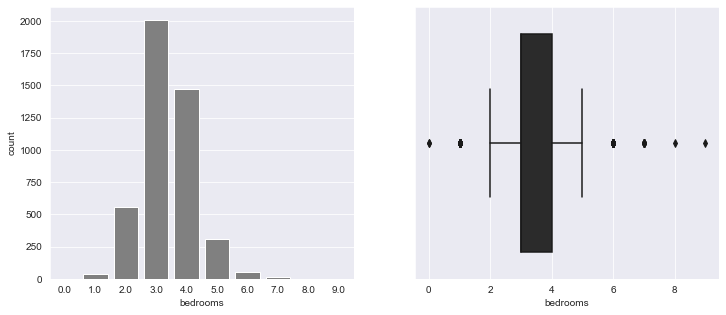

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df['bedrooms'], color = 'grey')
plt.subplot(1,2,2)
sns.boxplot(df['bedrooms'])

##### Bathrooms

<AxesSubplot:xlabel='bathrooms'>

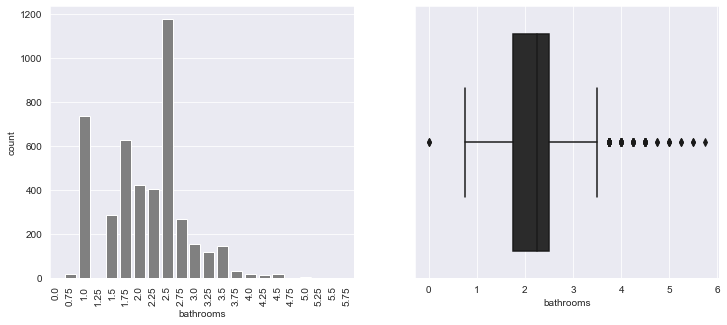

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
sns.countplot(df['bathrooms'], color = 'grey')
plt.subplot(1,2,2)
sns.boxplot(df['bathrooms'])

##### Floors

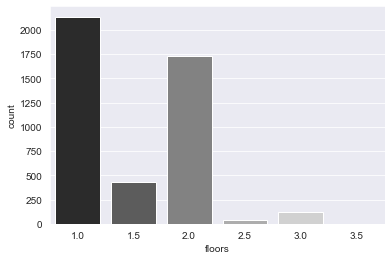

1.0    2135
1.5     434
2.0    1726
2.5      37
3.0     123
3.5       2
Name: floors, dtype: int64

In [21]:
sns.countplot(df['floors'])
plt.show()
df['floors'].value_counts().sort_index()

##### View

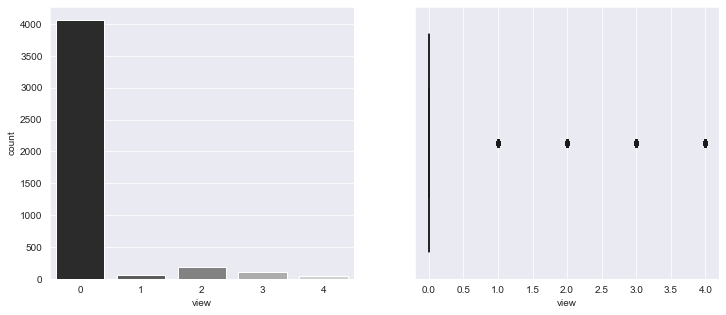

0    4063
1      61
2     186
3     100
4      47
Name: view, dtype: int64

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df['view'])
plt.subplot(1,2,2)
sns.boxplot(df['view'])
plt.show()

df['view'].value_counts().sort_index()

##### Condition

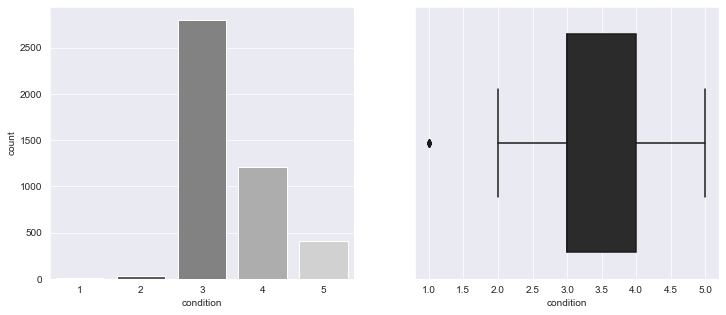

1       6
2      30
3    2799
4    1214
5     408
Name: condition, dtype: int64

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df['condition'])
plt.subplot(1,2,2)
sns.boxplot(df['condition'])
plt.show()

df['condition'].value_counts().sort_index()

##### Waterfront

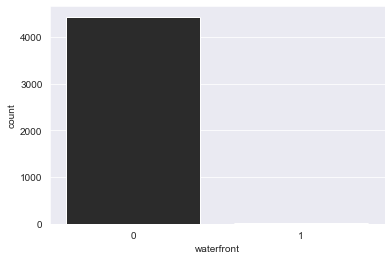

0    4438
1      19
Name: waterfront, dtype: int64


In [24]:
sns.countplot(df['waterfront'])
plt.show()
print(df['waterfront'].value_counts())

##### yr_built

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

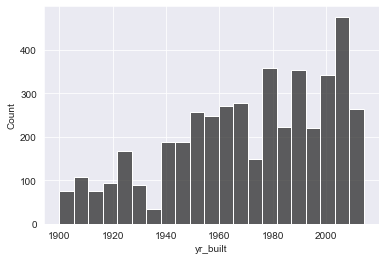

In [25]:
sns.histplot(df['yr_built'])

##### yr_revenue

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

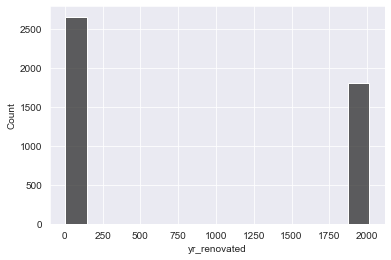

In [26]:
sns.histplot(df['yr_renovated'])

<AxesSubplot:xlabel='renovated', ylabel='count'>

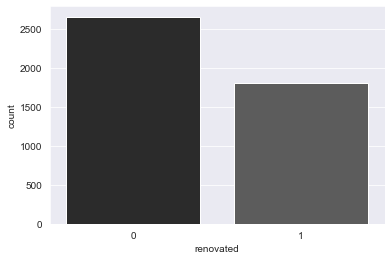

In [27]:
#將整修年份變數轉換為dummy變數(0代表物件未整修；1代表物件有整修)
df.rename(columns = {'yr_renovated':'renovated'}, inplace = True)
df['renovated'] = np.where(df['renovated'] != 0, 1, df['renovated'])
sns.countplot(df['renovated'])

##### sqft_living

<AxesSubplot:xlabel='sqft_living'>

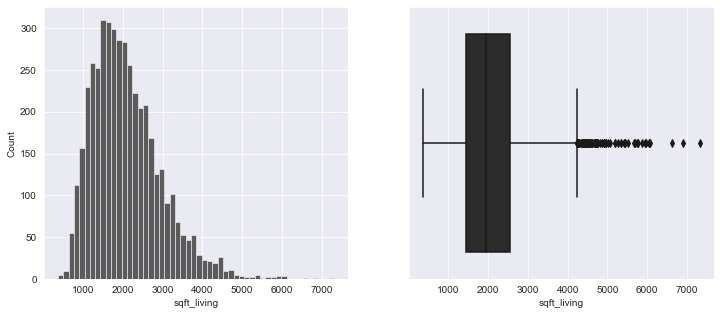

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['sqft_living'])
plt.subplot(1,2,2)
sns.boxplot(df['sqft_living'])

##### sqft_lot

<AxesSubplot:xlabel='sqft_lot'>

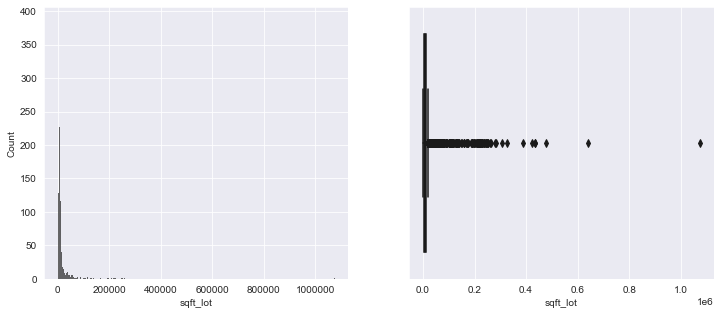

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['sqft_lot'])
plt.ticklabel_format(style='plain')
plt.subplot(1,2,2)
sns.boxplot(df['sqft_lot'])

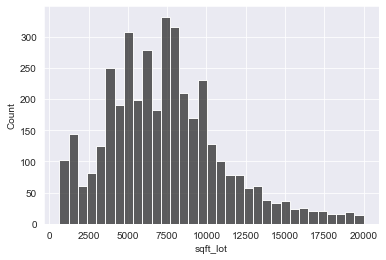

In [30]:
sns.histplot(df['sqft_lot'].drop(df[df['sqft_lot'] > 20000].index, axis=0))
plt.ticklabel_format(style='plain')

停車場面積的分布範圍分散，大多數小於20000。

##### sqft_above

<AxesSubplot:xlabel='sqft_above'>

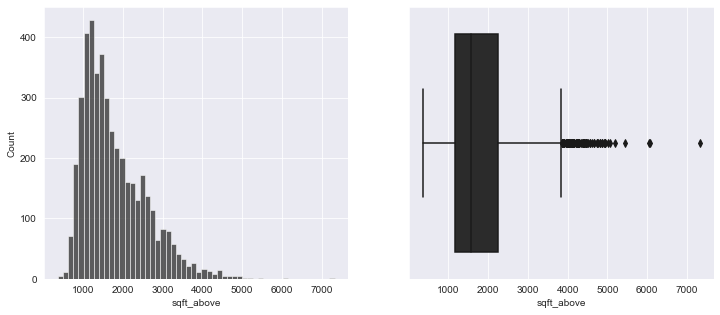

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['sqft_above'])
plt.subplot(1,2,2)
sns.boxplot(df['sqft_above'])

##### sqft_basement

<AxesSubplot:xlabel='sqft_basement'>

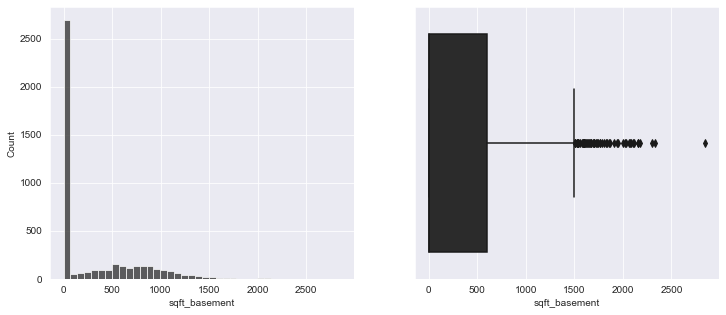

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['sqft_basement'])
plt.subplot(1,2,2)
sns.boxplot(df['sqft_basement'])

超過半數的物件地下室面積為0，表示無地下室。

##### Street, City, Statezip, Country

In [33]:
print('Number of Streets:',len(df['street'].unique()))

Number of Streets: 4384


Number of cities: 44


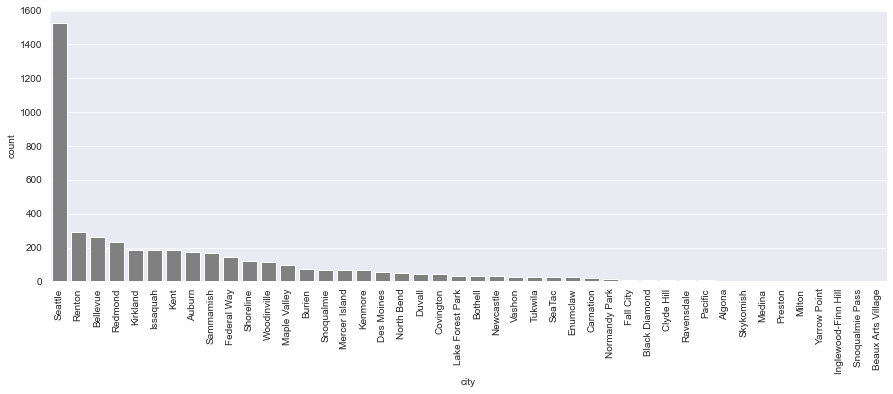

In [34]:
print('Number of cities:', len(df['city'].unique()))
plt.figure(figsize=(15,5))
sns.countplot(df['city'], order = df['city'].value_counts().sort_values(ascending=False).index, color = 'grey')
plt.xticks(rotation = 90)
plt.show()

Number of statezip: 77


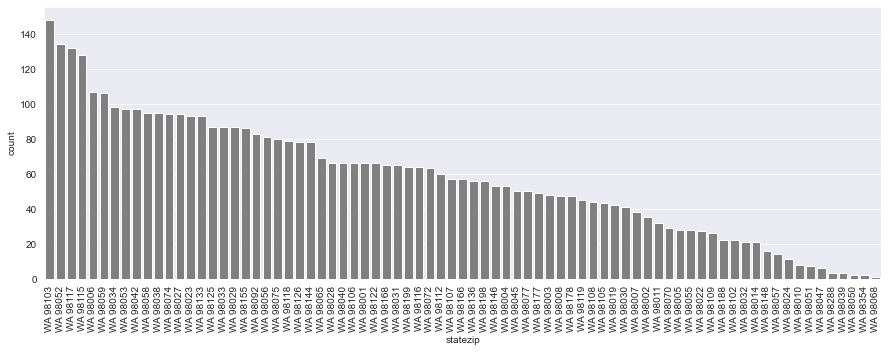

In [35]:
print('Number of statezip:', len(df['statezip'].unique()))
plt.figure(figsize=(15,5))
sns.countplot(df['statezip'], order = df['statezip'].value_counts().sort_values(ascending=False).index, color = 'grey')
plt.xticks(rotation = 90)
plt.show()

In [36]:
df['country'].unique()

array(['USA'], dtype=object)

In [37]:
del df['street']
del df['country']

In [38]:
df1 = df.copy()

### Relation between price and variables

##### Bedroom

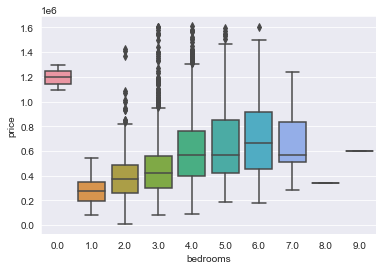

3.0    2008
4.0    1476
2.0     560
5.0     307
6.0      54
1.0      37
7.0      11
0.0       2
9.0       1
8.0       1
Name: bedrooms, dtype: int64

In [39]:
sns.boxplot(x = df1['bedrooms'], y = df1['price'])
plt.show()
df1['bedrooms'].value_counts()

臥室間數與房價成正比，但0間臥室的物件價格卻最高，不符合正常情況，其樣本數為2，應為特殊個案，故剔除。有8、9間臥室的物件也不符合規律，價格低於其他臥室較少的物件，故剔除。

In [40]:
df1.drop(df1[(df1['bedrooms'] == 0) | (df1['bedrooms'] >= 8)].index, axis=0, inplace=True)

##### Bathroom

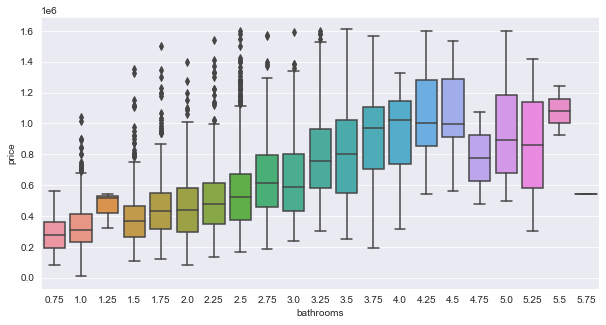

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.75,17.0,2.939559e+05,146989.849926,80000.0,190000.0,276000.0,3.600000e+05,562100.0
1.00,735.0,3.333702e+05,146788.444641,7800.0,229250.0,307000.0,4.100000e+05,1039000.0
1.25,3.0,4.611500e+05,121390.042837,321950.0,419225.0,516500.0,5.307500e+05,545000.0
1.50,286.0,4.105384e+05,205881.005432,107500.0,265012.5,367750.0,4.674375e+05,1355000.0
1.75,626.0,4.556976e+05,191716.784859,120750.0,314500.0,433000.0,5.497500e+05,1500000.0
2.00,423.0,4.648306e+05,206752.986694,83300.0,295000.0,437000.0,5.830000e+05,1400000.0
2.25,406.0,5.200438e+05,230880.066926,132250.0,350500.0,475000.0,6.139375e+05,1538000.0
2.50,1174.0,5.536567e+05,230034.673483,168000.0,375750.0,525000.0,6.731076e+05,1600000.0
2.75,266.0,6.453766e+05,249698.317331,188000.0,456000.0,612500.0,7.962500e+05,1575000.0


In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df1['bathrooms'], y = df1['price'])
plt.show()
df1['price'].groupby(df1['bathrooms']).describe()

浴廁間數與房價大致上呈正相關，但間數大於4.5的物件樣本數過少，以致無法判斷其不符合規律的情況是否合理，將移除之。

In [42]:
df1.drop(df1[df1['bathrooms'] >= 4.75].index, axis=0, inplace=True)

##### Floors

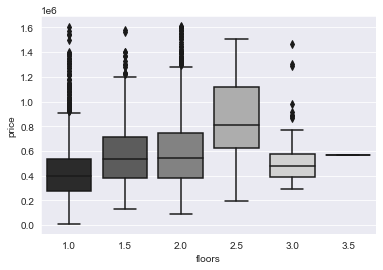

1.0    2132
2.0    1716
1.5     434
3.0     123
2.5      36
3.5       1
Name: floors, dtype: int64

In [43]:
sns.boxplot(x = df1['floors'], y = df1['price'])
plt.show()
df1['floors'].value_counts()

物件的樓層數與房價的關係無顯著規律，但可看出一層樓以上的物件平均價格皆高於僅有一層樓之物件，故我將把此變數轉換為dummy變數，0代表僅有一層樓之物件，1則代表兩層樓及以上之物件。

In [44]:
df1.rename(columns={'floors':'floors_more_than_1'}, inplace = True)
df1['floors_more_than_1'] = np.where(df1['floors_more_than_1'] > 1, 1, 0)

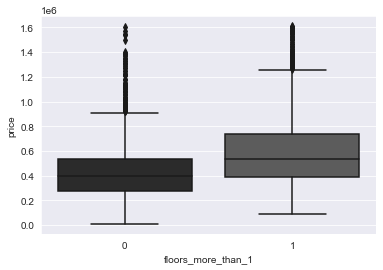

In [45]:
sns.boxplot(x = df1['floors_more_than_1'], y = df1['price'])
plt.show()

樓層數大於1之物件價格較高。

##### Waterfront

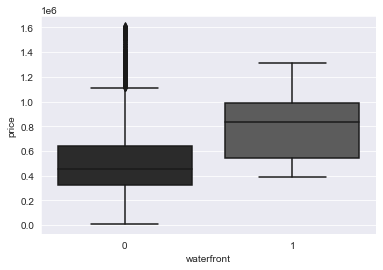

0    4423
1      19
Name: waterfront, dtype: int64

In [46]:
sns.boxplot(x = df1['waterfront'], y = df1['price'])
plt.show()

df1['waterfront'].value_counts()

沿海地區的平均房價較高，但樣本較少。

##### View

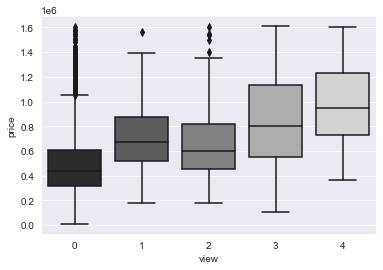

0    4054
1      60
2     182
3      99
4      47
Name: view, dtype: int64

In [47]:
sns.boxplot(x = df1['view'], y = df1['price'])
plt.show()

df1['view'].value_counts().sort_index()

看房次數與房價成正比，但大多數物件的看房次數為0次。

##### Condition

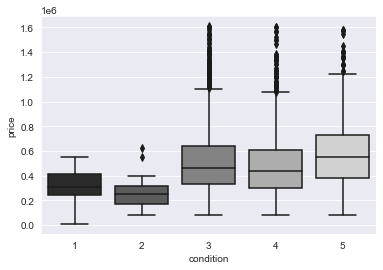

1       6
2      30
3    2785
4    1213
5     408
Name: condition, dtype: int64

In [48]:
sns.boxplot(x = df1['condition'], y = df1['price'])
plt.show()

df1['condition'].value_counts().sort_index()

一般情況下屋況評等越高價格也應越高，但評等1的物件價格卻高於評等2之物件，其樣本數為6，應為特殊個案，故刪除之。

In [49]:
df1.drop(df1[df1['condition'] == 1].index, axis=0, inplace=True)

##### Renovated

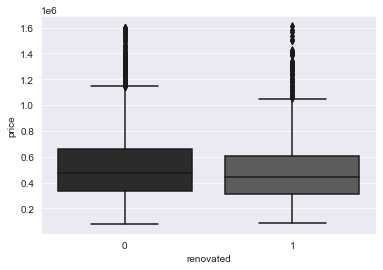

In [50]:
sns.boxplot(x = df1['renovated'], y = df1['price'])
plt.show()

整修過之物件價格略低於無整修過之物件，但差距不顯著。

##### yr_built

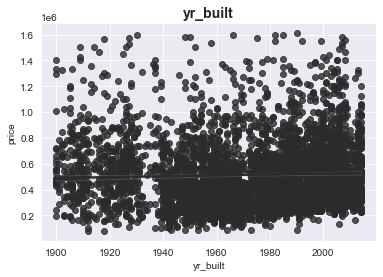

In [51]:
sns.regplot(x = df1['yr_built'], y = df1['price'])
plt.title('yr_built', fontsize = 14, weight = 'bold')
plt.show()

房價與建造年份(即屋齡之指標)無顯著線性關係。

##### sqft_living, sqft_lot, sqft_above, sqft_basement

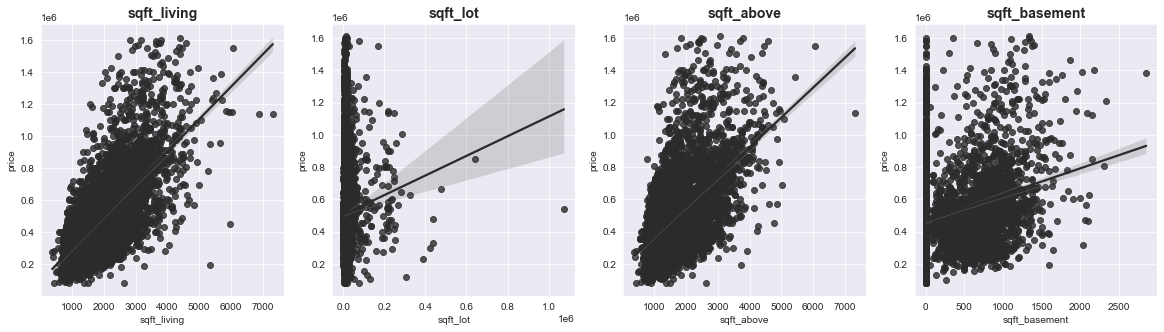

In [52]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.regplot(x = df1['sqft_living'], y = df1['price'])
plt.title('sqft_living', fontsize = 14, weight = 'bold')

plt.subplot(1,4,2)
sns.regplot(x = df1['sqft_lot'], y = df1['price'])
plt.title('sqft_lot', fontsize = 14, weight = 'bold')

plt.subplot(1,4,3)
sns.regplot(x = df1['sqft_above'], y = df1['price'])
plt.title('sqft_above', fontsize = 14, weight = 'bold')

plt.subplot(1,4,4)
sns.regplot(x = df1['sqft_basement'], y = df1['price'])
plt.title('sqft_basement', fontsize = 14, weight = 'bold')

plt.show()

In [53]:
sum(df1['sqft_basement'] == 0)

2675

物件面積、停車場面積、非地下室空間之面積以及地下室面積皆與房價呈正相關。超過半數的物件其地下室面積為0，表示該物件並無地下室，故我將把此變數轉換成dummy，以0表示無地下室，1則有。其餘三個變數皆存在極端值，為避免影響模型效果，將對極端值做處理。

In [54]:
df1.rename(columns={'sqft_basement':'basement'}, inplace = True)
df1['basement'] = np.where(df1['basement'] != 0, 1, 0)

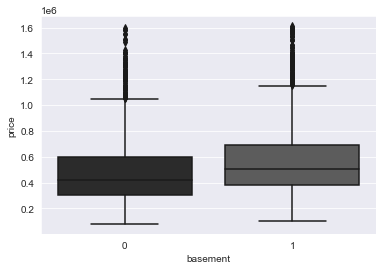

In [55]:
sns.boxplot(x = df1['basement'], y = df1['price'])
plt.show()

含地下室之物件平均房價略高。

In [56]:
print('Correlation between [sqft_living] & [sqft_above]:',df1['sqft_living'].corr(df1['sqft_above']))
print('Correlation between [sqft_living] & [price]:', df1['sqft_living'].corr(df1['price']))
print('Correlation between [sqft_above] & [price]:', df1['sqft_above'].corr(df1['price']))
print('Correlation between [sqft_lot] & [price]:', df1['sqft_lot'].corr(df1['price']))

Correlation between [sqft_living] & [sqft_above]: 0.8600757673330072
Correlation between [sqft_living] & [price]: 0.6601850346458787
Correlation between [sqft_above] & [price]: 0.5590523901349603
Correlation between [sqft_lot] & [price]: 0.08398259597540013


由相關係數可看出:<br>
(1)物件的總面積與非地下室空間之面積有高度相關，因總面積等於非地下室空間面積加上地下室面積，故兩項變數會有共線性問題。<br>
(2)物件總面積與價格之相關性相對高於非地下室空間面積與價格的相關性。<br>
(3)物件的停車場面積與價格間的關聯性極低，相關係數僅0.08。<br>
<br>
因移除離群值可能會失去部分重要資訊，故我只對較重要的變數(物件總面積)移除離群值，其餘兩個變數(非地下室空間面積、停車場面積)在後續建模時可能不會採用，所以暫不處理。

In [57]:
def remove_outlier(data,col):
    n = 3
    IQR = np.percentile(data[col],75) - np.percentile(data[col], 25)
    data = data[(data[col] < np.percentile(data[col], 75) + IQR * n) &
                (data[col] > np.percentile(data[col], 25) - IQR * n)]
    return data

In [58]:
df1 = remove_outlier(df1, 'sqft_living')

Text(0.5, 1.0, 'sqft_living')

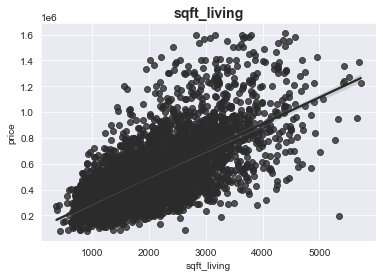

In [59]:
sns.regplot(x = df1['sqft_living'], y = df1['price'])
plt.title('sqft_living', fontsize = 14, weight = 'bold')

上圖有一樣本明顯偏離線性關係，為避免影響模型準確度，將移除之。

In [60]:
df1.drop(df1[(df1['sqft_living'] > 5000) & (df1['price'] < 400000 )].index, axis=0, inplace=True)

##### City & state ZIP

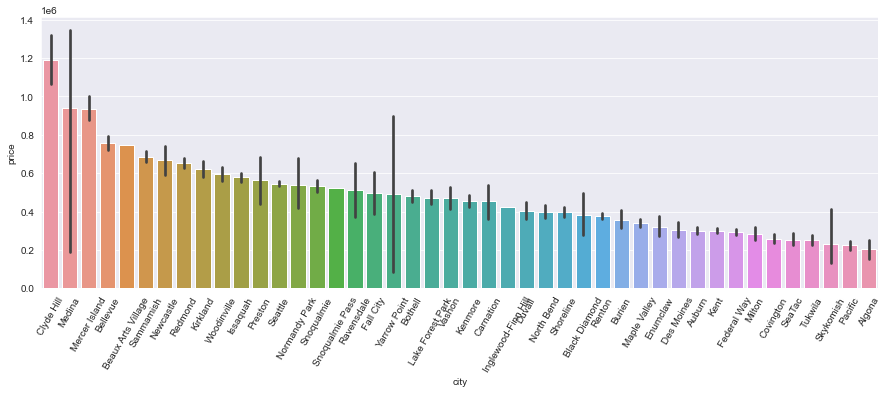

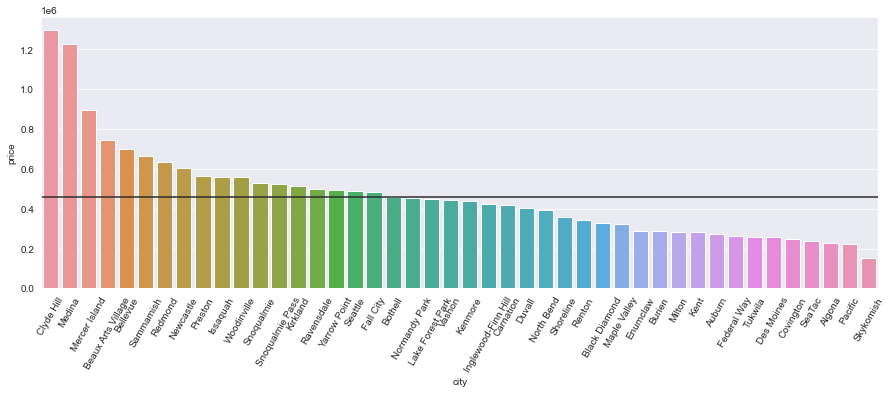

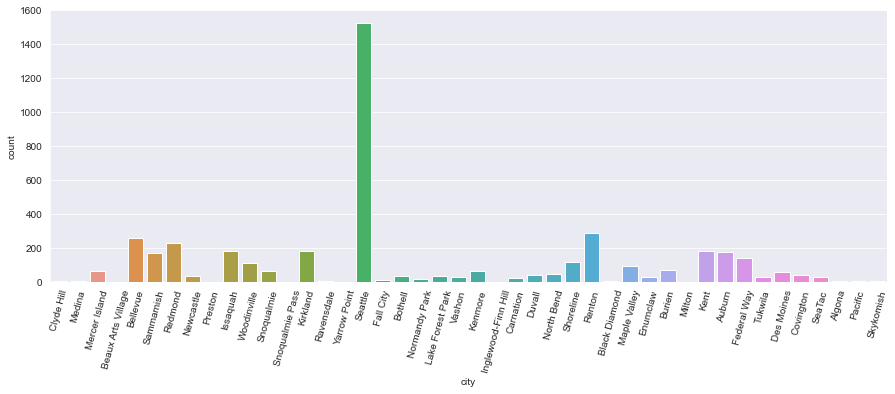

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(x = df1['city'], y = df1['price'],
            order = df1['price'].groupby(df1['city']).mean().sort_values(ascending=False).index)
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x = df1['price'].groupby(df1['city']).median().index,
            y = df1['price'].groupby(df1['city']).median(),
            order = df1['price'].groupby(df1['city']).median().sort_values(ascending=False).index)
plt.xticks(rotation = 60)
plt.axhline(y = df1['price'].median())
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x = df1['city'], order = df1['price'].groupby(df1['city']).median().sort_values(ascending=False).index)
plt.xticks(rotation = 75)
plt.show()

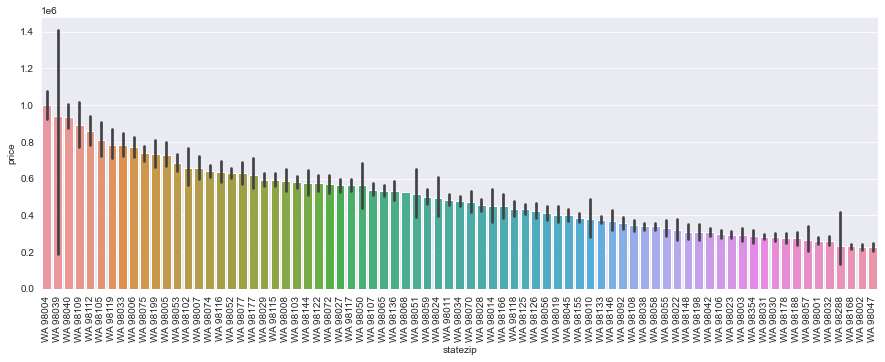

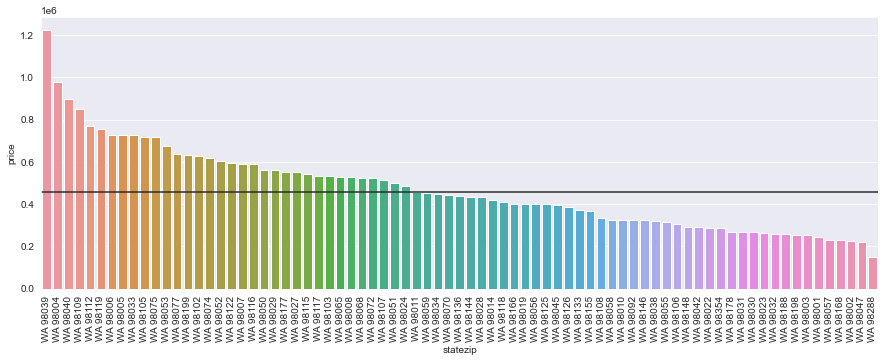

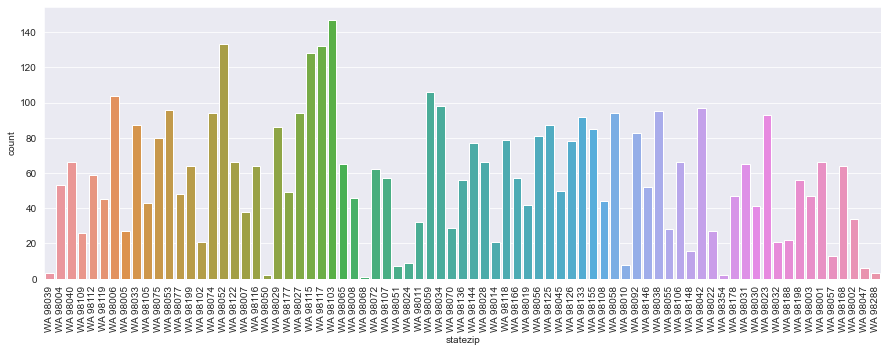

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(x = df1['statezip'], y = df1['price'],
            order = df1['price'].groupby(df1['statezip']).mean().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x = df1['price'].groupby(df1['statezip']).median().index,
            y = df1['price'].groupby(df1['statezip']).median(),
            order = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.axhline(y = df1['price'].median())
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x = df1['statezip'], order = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.show()

In [63]:
df1['statezip'].value_counts().sort_values().head(15)

WA 98068     1
WA 98354     2
WA 98050     2
WA 98039     3
WA 98288     3
WA 98047     6
WA 98051     7
WA 98010     8
WA 98024     9
WA 98057    13
WA 98148    16
WA 98032    21
WA 98102    21
WA 98014    21
WA 98188    22
Name: statezip, dtype: int64

物件所在城市與所在地之郵遞區號皆為物件地段之指標，我將依價格進行分組，惟城市變數高度集中在Seattle，其餘城市的樣本數較少，恐影響模型之準確性，故我將以郵遞區號分組。<br>
從郵遞區號平均價格圖可看出有幾個地區因樣本數較少，以致同地區內的房價離散程度大，我將先移除樣本數不足10的地區再進行分組。

In [64]:
remove_zip = df1['statezip'].value_counts()[df1['statezip'].value_counts() < 10].index.to_list()

In [65]:
df1.drop(df1[df1['statezip'].isin(remove_zip)].index, axis=0, inplace=True)

In [66]:
len(df1['statezip'].unique())

68

In [67]:
group_1 = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index.tolist()[:9]
group_2 = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index.tolist()[9:18]
group_3 = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index.tolist()[18:27]
group_4 = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index.tolist()[27:36]
group_5 = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index.tolist()[36:45]
group_6 = df1['price'].groupby(df1['statezip']).median().sort_values(ascending=False).index.tolist()[45:54]

In [68]:
df1['statezip_1'] = np.where(df1['statezip'].isin(group_1), 1, 0)
df1['statezip_2'] = np.where(df1['statezip'].isin(group_2), 1, 0)
df1['statezip_3'] = np.where(df1['statezip'].isin(group_3), 1, 0)
df1['statezip_4'] = np.where(df1['statezip'].isin(group_4), 1, 0)
df1['statezip_5'] = np.where(df1['statezip'].isin(group_5), 1, 0)
df1['statezip_6'] = np.where(df1['statezip'].isin(group_6), 1, 0)

In [69]:
print(df1['statezip_1'].sum())
print(df1['statezip_2'].sum())
print(df1['statezip_3'].sum())
print(df1['statezip_4'].sum())
print(df1['statezip_5'].sum())

510
640
811
583
587


In [70]:
del df1['city']
del df1['statezip']

In [71]:
df2 = df1.copy()

In [72]:
df2

,price,bedrooms,bathrooms,floors_more_than_1,view,condition,waterfront,yr_built,renovated,sqft_living,sqft_lot,sqft_above,basement,statezip_1,statezip_2,statezip_3,statezip_4,statezip_5,statezip_6
0,313000.000000,3.0,1.50,1,0,3,0,1955,1,1340,7912,1340,0,0,0,0,0,1,0
2,342000.000000,3.0,2.00,0,0,4,0,1966,0,1930,11947,1930,0,0,0,0,0,0,0
3,420000.000000,3.0,2.25,0,0,4,0,1963,0,2000,8030,1000,1,0,0,1,0,0,0
4,550000.000000,4.0,2.50,0,0,4,0,1976,1,1940,10500,1140,1,0,1,0,0,0,0
5,490000.000000,2.0,1.00,0,0,3,0,1938,1,880,6380,880,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,0,0,4,0,1954,1,1510,6360,1510,0,0,0,0,0,1,0
4596,534333.333333,3.0,2.50,1,0,3,0,1983,1,1460,7573,1460,0,0,1,0,0,0,0
4597,416904.166667,3.0,2.50,1,0,3,0,2009,0,3010,7014,3010,0,0,0,0,1,0,0
4598,203400.000000,4.0,2.00,0,0,3,0,1974,0,2090,6630,1070,1,0,0,0,0,0,0


### VIF

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [74]:
def VIF(data, col):
    x = data[col]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['variable'] = x.columns
    
    vif['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    
    vif = vif[vif['variable'] != 'const']
    
    return vif.sort_values('VIF', ascending = False)

In [75]:
features = df2.drop('price', axis=1).columns.to_list()

In [76]:
VIF(df2, features)

,variable,VIF
11,sqft_above,16.126434
9,sqft_living,15.681513
12,basement,3.770531
2,bathrooms,3.075508
7,yr_built,2.064590
15,statezip_3,1.887953
3,floors_more_than_1,1.827404
14,statezip_2,1.748335
1,bedrooms,1.694454
13,statezip_1,1.675695


變數'sqft_above'與'sqft_living'有共線性問題，將先移除'sqft_above'再檢視是否還存在共線性。

In [77]:
del df2['sqft_above']

In [78]:
features = df2.drop('price', axis=1).columns.to_list()

In [79]:
VIF(df2, features)

,variable,VIF
2,bathrooms,3.075352
9,sqft_living,2.849592
7,yr_built,2.049863
14,statezip_3,1.885943
13,statezip_2,1.743437
1,bedrooms,1.679477
12,statezip_1,1.675682
15,statezip_4,1.636633
3,floors_more_than_1,1.629144
16,statezip_5,1.621619


### Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn import metrics
from scipy import stats

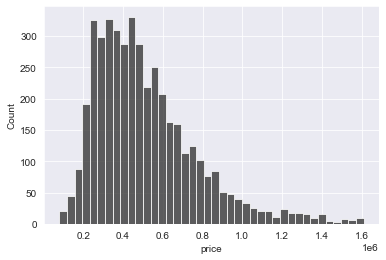

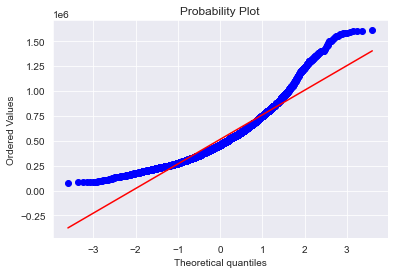

In [81]:
sns.histplot(df2['price'])
plt.show()
stats.probplot(df2['price'], plot=plt)
plt.show()

價格有偏態問題，故取對數。

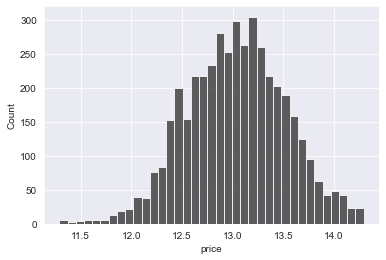

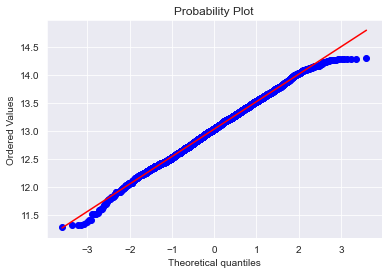

In [82]:
price_log = np.log(df2['price'])

sns.histplot(price_log)
plt.show()
stats.probplot(price_log, plot=plt)
plt.show()

In [83]:
price_log

0       12.653958
2       12.742566
3       12.948010
4       13.217674
5       13.102161
          ...    
4595    12.638396
4596    13.188775
4597    12.940612
4598    12.222930
4599    12.304106
Name: price, Length: 4387, dtype: float64

In [84]:
price_log = price_log[price_log > price_log.mean() - 3 * price_log.std()]

In [85]:
X = df2.drop(['price'], axis = 1).loc[price_log.index.tolist()]
y = price_log

In [86]:
def reg_result(X, y):
    X2 = add_constant(X)
    est = sm.OLS(y, X2)
    est = est.fit()
    print(est.summary())

In [87]:
reg_result(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     951.2
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        17:50:20   Log-Likelihood:                 380.31
No. Observations:                4374   AIC:                            -724.6
Df Residuals:                    4356   BIC:                            -609.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7146      0

In [88]:
X.drop(['basement'], axis=1, inplace=True)
reg_result(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1011.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        17:50:20   Log-Likelihood:                 380.17
No. Observations:                4374   AIC:                            -726.3
Df Residuals:                    4357   BIC:                            -617.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7488      0

In [89]:
X.drop(['sqft_lot'], axis=1, inplace=True)
reg_result(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1078.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        17:50:20   Log-Likelihood:                 379.86
No. Observations:                4374   AIC:                            -727.7
Df Residuals:                    4358   BIC:                            -625.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7491      0

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [91]:
def reg_model(X_train, X_test, y_train, y_test):
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('train score :',reg.score(X_train, y_train))
    print('test score :',reg.score(X_test, y_test))
    print('-'*80)
    print('MAE', metrics.mean_absolute_error(y_test, y_pred))
    print('MAPE',metrics.mean_absolute_percentage_error(y_test, y_pred))
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(y_test - y_pred)
    plt.xlabel('Test - Prediction', fontsize = 13)
    plt.subplot(1,2,2)
    sns.regplot(x = y_test, y = y_pred)
    plt.xlabel('Test', fontsize = 13)
    plt.ylabel('Pridiction', fontsize = 13)
    plt.tight_layout(pad = 2)
    plt.show()
    print('-'*80)
    
    print('[True Value]')
    true_y = np.exp(y_test)
    pred_y = np.exp(y_pred)
    
    print('MAE', metrics.mean_absolute_error(true_y, pred_y))
    print('MAPE',metrics.mean_absolute_percentage_error(true_y, pred_y))
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(true_y - pred_y)
    plt.xlabel('Test - Prediction', fontsize = 13)
    
    plt.subplot(1,2,2)
    sns.regplot(x = true_y, y = pred_y)
    plt.xlabel('Test', fontsize = 13)
    plt.ylabel('Pridiction', fontsize = 13)
    plt.tight_layout(pad = 2)
    
    plt.show()

train score : 0.7890544669627509
test score : 0.7834625248629323
--------------------------------------------------------------------------------
MAE 0.16489914706540018
MAPE 0.012691537216362557


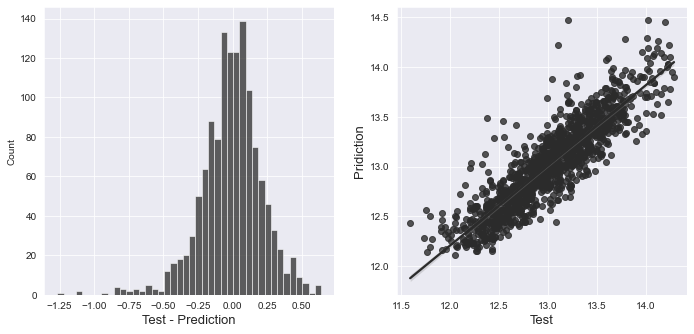

--------------------------------------------------------------------------------
[True Value]
MAE 85849.83076011996
MAPE 0.173663058177797


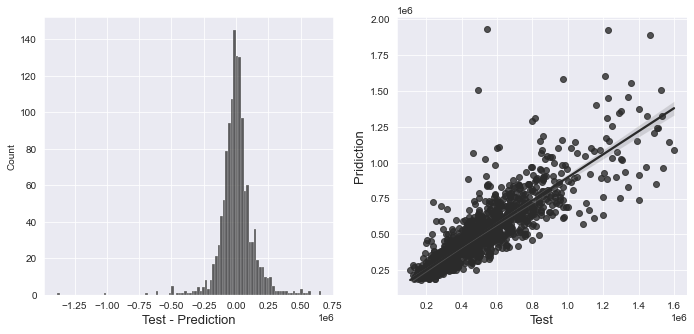

In [92]:
reg_model(X_train,X_test,y_train,y_test)

In [93]:
rf = RandomForestRegressor(n_estimators = 150,
                           max_features = 13,
                           max_depth = 10,
                           random_state = 42)

In [94]:
def rf_model(X_train, X_test, y_train, y_test):
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    print('train score :',rf.score(X_train, y_train))
    print('test score :',rf.score(X_test, y_test))
    print('-'*80)
    
    print('MAE', metrics.mean_absolute_error(y_test, y_pred))
    print('MAPE',metrics.mean_absolute_percentage_error(y_test, y_pred))
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(y_test - y_pred)
    plt.xlabel('Test - Prediction', fontsize = 13)
    plt.subplot(1,2,2)
    sns.regplot(x = y_test, y = y_pred)
    plt.xlabel('Test', fontsize = 13)
    plt.ylabel('Pridiction', fontsize = 13)
    plt.tight_layout(pad = 2)
    plt.show()
    print('-'*80)
    
    print('[True Value]')
    true_y = np.exp(y_test)
    pred_y = np.exp(y_pred)
    
    print('MAE', metrics.mean_absolute_error(true_y, pred_y))
    print('MAPE',metrics.mean_absolute_percentage_error(true_y, pred_y))
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(true_y - pred_y)
    plt.xlabel('Test - Prediction', fontsize = 13)
    plt.subplot(1,2,2)
    sns.regplot(x = true_y, y = pred_y)
    plt.xlabel('Test', fontsize = 13)
    plt.ylabel('Pridiction', fontsize = 13)
    plt.tight_layout(pad = 2)
    
    plt.show()

train score : 0.8910461995151967
test score : 0.7682524751208978
--------------------------------------------------------------------------------
MAE 0.17021197124932874
MAPE 0.013087191616052797


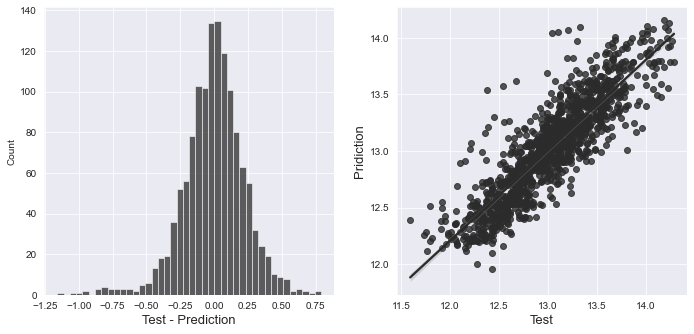

--------------------------------------------------------------------------------
[True Value]
MAE 88688.70520170129
MAPE 0.17829794074008892


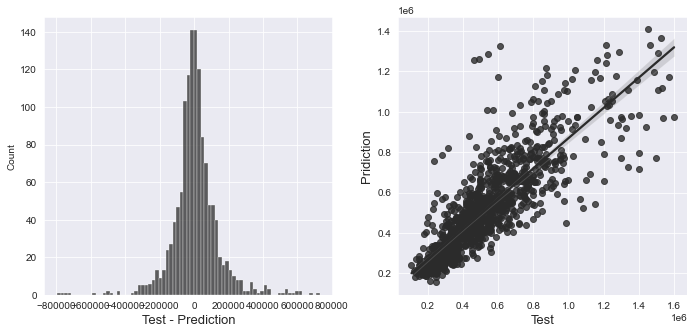

In [95]:
rf_model(X_train,X_test,y_train,y_test)